# Chapter 6 - Basis

# 6.1 좌표계

## 6.1.1 데카르트의 생각

- 그는 기하학적 분석을 대수적으로 접근할 수 있음을 알게 되었다.

## 6.1.2 좌표표현

- 위치를 측정하는 두 개의 숫자를 *좌표*라고 한다.
- 벡터공간 V에 대한 좌표계는 V의 생성자 $a_1, ..., a_n$에 의해 명시된다. V내의 모든 벡터 v는 선형결합으로 나타낼 수 있다.
$$v=\alpha_1a_1+...+\alpha_na_n$$
- 계수들은 *좌표*라고 하고 벡터 $[\alpha_1,...,\alpha_n]$은 $a_1,...,a_n$에 대한 v의 *좌표표현*이라고 한다.

### Example 6.1.1. 
벡터 v=[1,3,5,3]는 1[1,1,0,0]+2[0,1,1,0]+3[0,0,1,1]와 동일하다. 따라서 v의 벡터 [1,1,0,0],[0,1,1,0],[0,0,1,1]에 대한 좌표표현은 [1,2,3]이다

### Exampel 6.1.2
벡터 [6,3,2,5]의 벡터 [2,2,2,3],[1,0,-1,0],[0,1,0,1]에 대한 좌표표현은 무엇인가?
$$[6,3,2,5]=2[2,2,2,3]+2[1,0,-1,0]-1[0,1,0,1]$$
구하고자 하는 좌표표현은 [2,2,-1]이다

### Example 6.1.3
GF(2)상에서, 벡터 [0,0,0,1]의 벡터 [1,1,0,1],[0,1,0,1],[1,1,0,0]에 대한 좌표표현은 무엇인가?
$$[0,0,0,1]=1[1,1,0,1]+0[0,1,0,1]+1[1,1,0,0,]$$
구하고자 하는 좌표표현은 [1,0,1]이다.

## 6.1.3 좌표표현과 행렬-벡터 곱셈

좌표축이 $a_1,...,a_n$이라고 해보자. 행렬 $A=\begin{bmatrix}  & &   \\ a_1 & ...  & a_n\\ & & & \end{bmatrix}$을 구성해 보자. 이때, 이 행렬의 열들은 생성자이다.
- "u는 $a_1,...,a_n$에 대한 v의 좌표표현이다."라는 것을 행렬-벡터 방정식으로 쓸 수 있다.
$$Au=v$$
- 그러므로, 좌표표현 u에서 표현할 벡터를 나타내려면 A와 u를 곱한다.
- 더욱이, 벡터 v에서 그 좌표표현 얻으려면 행렬-벡터 방정식 Ax=v를 풀면된다. A의 열들은 V에 대한 생성자들이고, v는 V에 속하므로 방정식은 적어도 하나의 해를 가져야 한다.

# 6.2. 손실압축 들여다 보기

2000x1000의 흑백 이미지는 D-벡터에 의해 표현될 수 있다. 여기서, D={0,1,...,1999}x{0,1,...,999}이다.

## 6.2.1 Strategy 1: 벡터를 가장 가까운 스파스 벡터로 대체하기

- 벡터를 가장 가까운 k-스파스 벡터로 대체하는 것을 고려해 보자. 

### Question 6.2.1
주어진 벡터 v와 양의 정수 k에 대해, v에 가장 가까운 k-스파스 벡터는 무엇인가?

- 자세한 내용은 9장에서 다루며, 가장 가까운 k-스파스 벡터는 v에서 단순히 크기가 가장 큰 k개 엔트리를 제외한 나머지 엔트리를 모두 영으로 대체함으로써 얻을 수 있음을 알게 될 것이다.

### Example 6.2.2
이미지 <span style="background-color:rgb(200,200,200)">&nbsp;&nbsp;&nbsp;&nbsp;</span><span style="background-color:rgb(75,75,75)">&nbsp;&nbsp;&nbsp;&nbsp;</span><span style="background-color:rgb(200,200,200)">&nbsp;&nbsp;&nbsp;&nbsp;</span><span style="background-color:rgb(75,75,75)">&nbsp;&nbsp;&nbsp;&nbsp;</span>는 4개의 픽셀로 된 하난의 행으로 구성되며, 픽셀의 밝기는 200,75,200,75이다. 따라서 이 이미지는 4개의 숫자로 표현된다. 가장 가까운 2-스파스 이미지는 밝기 200,200,0,0을 가지는 다음 이미지이다. <span style="background-color:rgb(200,200,200)">&nbsp;&nbsp;&nbsp;&nbsp;</span><span style="background-color:rgb(0,0,0)">&nbsp;&nbsp;&nbsp;&nbsp;</span><span style="background-color:rgb(200,200,200)">&nbsp;&nbsp;&nbsp;&nbsp;</span><span style="background-color:rgb(0,0,0)">&nbsp;&nbsp;&nbsp;&nbsp;</span>

___
현실적인 이미지를 살펴보자.

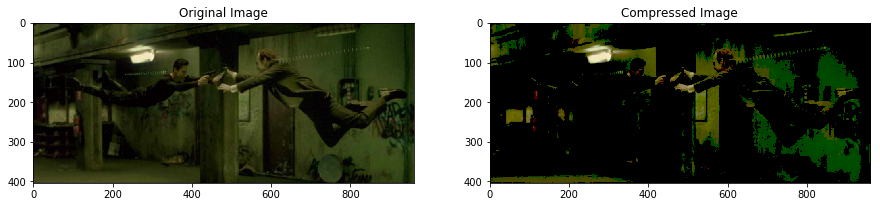

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread 
img = imread('matrix.jpg')

percent10 = np.percentile(img, 90)
compress_img = img.copy()
compress_img[compress_img<percent10] = 0

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
ax1.set_title('Original Image')
ax1.imshow(img)
ax2.set_title('Compressed Image')
ax2.imshow(compress_img)

plt.show()

## 6.2.2 Strategy 2: 이미지 벡터를 좌표표현으로 표현하기

- 이미지를 압축하려고 하기전에 벡터들의 컬렉션 $a_1,...,a_n$을 선택한다.
- 다음에, 각 이미지 벡터에 대해 그 벡터의 $a_1,...,a_n$에 대한 좌표표현 u를 찾아 그것을 저장한다.
- 좌표표현으로부터 원래 이미지를 복원하기 위해 대응하는 선형결합을 계산한다.

### Example 6.2.3
$a_1=$<span style="background-color:rgb(240,240,240)">&nbsp;&nbsp;&nbsp;&nbsp;</span><span style="background-color:rgb(0,0,0)">&nbsp;&nbsp;&nbsp;&nbsp;</span><span style="background-color:rgb(240,240,240)">&nbsp;&nbsp;&nbsp;&nbsp;</span><span style="background-color:rgb(0,0,0)">&nbsp;&nbsp;&nbsp;&nbsp;</span>(255, 0, 255, 0인 4개의 픽셀을 가진 하나의 행으로 구성된 이미지), $a_2=$<span style="background-color:rgb(0,0,0)">&nbsp;&nbsp;&nbsp;&nbsp;</span><span style="background-color:rgb(240,240,240)">&nbsp;&nbsp;&nbsp;&nbsp;</span><span style="background-color:rgb(0,0,0)">&nbsp;&nbsp;&nbsp;&nbsp;</span><span style="background-color:rgb(240,240,240)">&nbsp;&nbsp;&nbsp;&nbsp;</span>(0, 255, 0, 255인 4개의 픽셀을 가진 하나의 행으로 구성된 이미지)
 이제, 이미지 <span style="background-color:rgb(200,200,200)">&nbsp;&nbsp;&nbsp;&nbsp;</span><span style="background-color:rgb(75,75,75)">&nbsp;&nbsp;&nbsp;&nbsp;</span><span style="background-color:rgb(200,200,200)">&nbsp;&nbsp;&nbsp;&nbsp;</span><span style="background-color:rgb(75,75,75)">&nbsp;&nbsp;&nbsp;&nbsp;</span>를 $a_1,a_2$에 대해 표현하고자 한다고 해보자.
<span style="background-color:rgb(200,200,200)">&nbsp;&nbsp;&nbsp;&nbsp;</span><span style="background-color:rgb(75,75,75)">&nbsp;&nbsp;&nbsp;&nbsp;</span><span style="background-color:rgb(200,200,200)">&nbsp;&nbsp;&nbsp;&nbsp;</span><span style="background-color:rgb(75,75,75)">&nbsp;&nbsp;&nbsp;&nbsp;</span>$=\frac{200}{255}a_1 + \frac{75}{255}a_2$로 나타낼 수 있고, 따라서 이 이미지는 퐈표표현 $[\frac{200}{255},\frac{75}{255}]$에 의해 압축된 형태로 나나탤 수 있다.

### Question 6.2.4
주어진 벡터공간 V에 대해, V=Span{$a_1,...,a_n$}인지 어떻게 알 수 있는가?

### Question 6.2.5
주어진 벡터공간 V에 대해, 생성이 V와 동일하게 되는 최소 개수의 벡터들은 무엇인가?

___
이미지 압축에 대한 두 번째 전략은 결국 실패하게 될 것이다. 모든 가능한 2000x1000이미지의 집합을 생성하는 데 필요한 최소 개수의 벡터들의 수는 작지 않아 압축을 달성하기 어렵다.

## Strategy 3: 하이브리드 방식

1. 벡터 $a_1,...,a_n$을 선택한다.
2. 압축하고자 하는 각 이미지에 대해, 대응하는 벡터 v를 취하고 $a_1,...,a_n$에 대한 좌표표현 u를 찾는다.
3. 다음에, u를 가장 가까운 k-스파스 벡터 $\tilde u$로 대체하고 $\tilde u$로 저장한다.
4. $\tilde u$로 부터 원래 이미지를 복원하기 위해 $a_1,...,a_n$의 대응하는 선형결합을 계산한다.
 
이 방법이 잘 동작하기 위해서는 아래의 두 가지 조건을 만족해야 한다.
- Step 2는 항상 성공해야 한다. 임의의 벡터 v를 컬렉션 내의 벡터들에 대해 표현하는 것이 가능해야 한다.
- Step 3는 이미지를 크게 왜곡하지 않아야 한다. 좌표표현이 $\tilde u$인 이미지는 좌표표현이 u인 원래 이미지와 많이 다르지 않아야 한다.

# 6.3 생성자 집합을 찾기 위한 두 개의 Greedy 알고리즘

## 6.3.1 Grow 알고리즘

def Grow(V)

$\quad B=\emptyset$

$\quad$ repeat while possible:

$\quad\quad$  find a vector v in V that is not in Span B, and put it in B

### Example 6.3.1
$\mathbb R^3$에 대한 생성자들의 집합을 선택하는 Grow 알고리즘을 사용해 보자. 이터레이션마다 [1,0,0], [0,1,0], [0,0,1]의 벡터들을 고려해 보자. 세 벡터들은 B에 포함되고나서 종료하게 된다. 임의의 벡터 $v=(\alpha_1, \alpha_2, \alpha_3)$은 $Span(e_1,e_2,e_3)$ 내에 있다.

## 6.3.2 Shrink 알고리즘

def Shrink(V)

$\quad$ B=some find finite set of vectors that spans V

$\quad$ repeat while possible:

$\quad\quad$  find a vector v in B such $Span(B-{v})=V$, and remove v from B

### Example 6.3.2
단순한 예로 처음에 다음 벡터들로 구성되어 있다고 생각해보자.
$$v_1=[1,0,0]$$
$$v_2=[0,1,0]$$
$$v_3=[1,2,0]$$
$$v_4=[3,1,0]$$

첫 번째 이터레이션 후 $v_4=3v_1+v_2$와 같기 때문에 $B={v_1,v_2,v_3}$이 된다. 첫 번째 이터레이션 후 $v_3=v_1+2v_2$와 같기 때문에 $B={v_1,v_2}$이 된다. $SpanB=\mathbb R^2$이 되고 종료된다.

___
Note: 위의 알고리즘을 실제로 구현할 수 있는 것은 아니다.
- 입력, 즉 벡터공간이 어떻게 정해지는지 명시하지 않음.
- 각 단계가 어떻게 수행되는지 명시하지 않음
- 각 이터레이션에서 어느 벡터를 선택하는지 명시하지 않음.

## 6.3.3 Greedy 알고리즘이 실패하는 경우

지배집합([Domninating set](https://en.wikipedia.org/wiki/Dominating_set))
- 그래프 이론 중에 하나로 지배집합은 그래프의 모든 노드가 그 집합에 내에 있거나 집합 내 어떤 노드의 이웃이 되는 그런한 노드들의 집합이다. 최소 지배집합 문제(minimum-dominationg set problem)의 목적은 최소 크기의 지배결합을 찾는 것이다.
- Grow, Shrink 알고리즘을 사용하여 지배집합을 찾을 수 있지만 더 작은 지배집합이 있을 수 있다.
- Grow, Shrink 알고리즘은 Greedy알고리즘이라 불린다. 이런 알고리즘은 매 단계에서 미래에 대한 고려 없이 현시점에서 최선인 선택을 하기 때문이다.
- 벡터공간에 대한 가장 작은 생성 집합을 찾는 Grow, Shrink 알고리즘은 아주 훌륭하다. 나주엥 알게 되겠지만 이 알고리즘들은 실제로 가장 크기가 작은 솔루션을 찾는다.

# 6.4 최소 스패닝포리스트(Minimum Spanning Forest)와 GF(2)

## 6.4.1 정의

### Definition 6.4.1
그래프 G에 대해, 에지들의 시퀀스

$[\{x_1,x_2\},\{x_2,x_3\},...,\{x_{k-1},x_k\}]$

는 $x_1-x_k$ 경로(또는 $x_1에서 x_k로의 경로$)라고 한다.

### Definition 6.4.2
만약 그래프 G의 모든 에지 {x,y}에 대해 S의 에지들로 구성되는 x에서 y로의 경로가 존재한다면, 에지들의 집합 S는 G에 대한 스패닝(spanning)이다.

### Definition 6.4.3 
포리스트(forest)는 사이클(여러 개의 에지들로 구성될 수 있는 루프)를 포함하지 않는 에지들의 집합이다.

## 6.4.2 최소 스패닝포리스트에 대한 Grow 및 Shrink 알고리즘

def Grow(G)

$\quad B:=\emptyset$

$\quad$ consider the edges in order , from lowest-weight to highest-weight

$\quad$ for each edge e:

$\quad\quad$  if e's endpoints are not yet connected via edges in B:

$\quad\quad\quad$  add e to B.

def Shrink(V)

$\quad$ B={all edges}

$\quad$ consodier the edges in order, from highest-weight to lowest-wegith 

$\quad$ for each edge e:

$\quad\quad$  if every pair of nodes are connected via B-{e}:

$\quad\quad\quad$  remove e from B.

## 6.4.3 선형대수학으로 최소 스패닝포리스트 구성하기

- D는 노드들의 집합이라 하자. D의 부분집합은 대응하는 엔드리들은 1이고 다른 엔트리들은 0인 벡터에 의해 표현된다.
- 각 에지는 D의 2-원소 부분집합이고 그래서 어떤 벡터, 즉 e의 양 끝은 1이고 다른 곳은 0인 벡터에 의해 표현된다.
- 일반적으로, 엔트리 x와 y가 1인 벡터는 그래프의 x에서 y로의 경로를 형서하는 에지들에 대응하는 벡터들의 합이다. 따라서 이러한 벡터들에 대해서는 하나의 벡터가 어떤 다른 벡터들에 생성에 속하는지 쉽게 알아낼 수 있다. 즉 에지들의 선형결합으로 1인 나오는 엔트리들은 서로 연결되어 있다.
- Grow, Shrink를 결정하기 위해 MSF알고리즘에 사용된 조건들은 단순히 생성 조건(span condition)을 테스트하는 것이며 이것은 벡터의 Grow, Shrink 알고리즘에서와 동일하낟.

### Example 6.4.4.
p248 그림 참고. 

에지들의 합(선형결합 GF(2))으로 표현 가능한 에지들은 연결되어 있지만, 합으로 표현하지 못하는 경우에는 연결되어 있지 않다.

### Example 6.4.5
p248 그림 참고. example 6.4.4와 같은 경우로 그래프 모양만 다른 경우.

에지들의 합(선형결합 GF(2))으로 표현 가능한 에지들은 연결되어 있지만, 합으로 표현하지 못하는 경우에는 연결되어 있지 않다.

# 6.5 선형(일차) 종속

## 6.5.1 Superfluous-Vector 보조정리

### Lemma 6.5.1 (Superfluous-Vector Lemma)
임의의 집합 S와 임의의 벡터 $v\in S$에 대해, 만약 v가 S내의 다른 벡터들의 선형결합으로 표현될 수 있으면, Span(s-{v})=Span S이다.

## 6.5.2 일차종속 정의하기

### Definition 6.5.2
벡터 $v_1,...,v_n$은 만약 영벡터가 벡터들의 자명하지 않는(nontrivial) 선형결합으로 표현될 수 있으면 *일차종속*이다.
$$0=\alpha_1v_1+...+\alpha_nv_n$$
이 경우, 이러한 선형결합을 $v_1,...v_n$의 *일차종속성*이라 한다.

한편, 만약 영벡터와 동일한 유일한 선형결합이 자명한(trivial) 선형결합이면, $v_1,...v_n$은 *일차독립*이다.

### Example 6.5.3
벡터 [1,0,0], [0,2,0], [2,4,0]은 다음 식에서 보여주는 것과 같이 일차종속이다.

2[1,0,0]+2[0,2,0]-1[2,4,0]=[0,0,0]

### Example 6.5.4
벡터 [1,0,0], [0,2,0], [0,0,4]는 일차 독립이다.

### Computational Problem 6.5.5 일차종속 테스트하기
- input: 벡터들의 리스트 [v_1,...,v_n]
- output: 벡터들이 일차종속이면 DEPENDENDENT, 그렇지 않으면 INDEPENDENT

대부분의 경우, 일차종속을 보여주는 것은 쉽지 않다.

이 계산 문제는 두 개의 예전 질문을 다시 말하는 것이다.
- A=[v_1|...|v_n], 벡터 v_1,...,v_n이 일차종속일 필요충분조건은 $Au=0$을 만족하는 영이 아닌 벡터 u가 존재하는 것, 즉 A의 영공간은 영이 아닌 벡터를 포함하는 것이다. 이것은 Question 5.7.7 행렬의 영공간이 영벡터로만 구성되는지 어떻게 알 수 있는가?란 질문이다.
- Question4.6.5 동차 선형시스템이 자명한 해만 가지는지 어떻게 알 수 있는가?와 동일한다.

### Problem 6.5.6
영벡터를 포함하는 독립 집합은 없다는 것을 보여라.

A) $v_1,..,v_n$ 벡터가 있고 v_i가 영벡터이면, 

$0=\alpha_1v_1+...+\alpha_iv_i+\alpha_nv_n$에서 $\alpha_i$만 0인 아닌 경우에 만족한다. 즉, nontrivial한 해를 가진다.

## 6.5.3 최소 스패닝포리스트의 일차종속

사이클을 형성하는 에지들에 대응하는 벡터들을 더하면 영벡터를 얻을 수 있다. 즉 사이클을 형성하면 일차종속이다. 사이클을 형성하지 않으면 일차독립이다.

### Example 6.5.7
아래 그래프에서 main, keeney, wristion를 합한 경우 영벡터이다. 영벡터는 자명하지 않은 선형결합과 동일하다. 즉 일차종속이다.

       Main  Keeney Wristion Gregorian
+1 $*$.......1...............1
 
+1 $*$.......1..............................1

+1 $*$.......................1..............1

+0 $*$......................................1.....................1

## 6.5.4 일차독립/종속의 성질

### Lemma 6.5.8
일차독립 집합의 부분집합은 일차독립이다.

### Lemma 6.5.9(Span Lemma)
$v_1,...,v_n$은 벡터들이라 하자. 벡터 $v_i$가 다른 벡터들의 생성 내에 있을 필요충분조건은 영벡터가 $v_1,...,v_n$의 선형결합으로 표현될 수 있으며 $v_i$의 계수가 0이 아닌 것이다.

## 6.5.5 Grow 알고리즘 분석하기

### Corollary 6.5.10 (Grow-Alogrithm Corollary)
Grow 알고리즘에 의해 얻어진 벡터들은 일차독립이다.

## 6.5.6 Shrink 알고리즘 분석하기

### Corollary 6.5.11 (Shrink-Algorithm Corollary)
Shrink 알고리즘에 의해 얻어진 벡터들을 일차독립이다.

# 6.6 기저

## 6.6.1 기저 정의하기

### Definition 6.6.1
V는 벡터 공간이라 하자. V에 대한 기저(basis)는 V에 대한 생성자들로 구성된 일차독립 집합이다.

___
따라서 V의 벡터들의 집합 B는 만약 B가 다음 두 성질을 만족하면 V에 대한 기저이다.
- Property B1 (Spanning) Span B = V
- Property B2 (Independent) B는 일차 독립니다.

### Example 6.6.2
V는 [1,0,2,0], [0,-1,0,-2], [2,2,4,4]에 의해 생성된 벡터공간이라 정의하자. 그러면 집합 {[1,0,2,0], [0,-1,0,-2], [2,2,4,4]}는 일차독립이 아니므로 V에 대한 기저가 아니다

1[1,0,2,0]-1[0,-1,0,-2]-(1/2)[2,2,4,4]=0

하지만 집합 {[1,0,2,0], [0,-1,0,-2]}은 기저이다. 
- 이 두벡터는 서로 다른 위치에 0인 엔트리를 가지므로 일차독립이다.
- 이 두벡터의 V를 생성한다고 할 수 있다. 선형결합으로 [2,2,4,4]=2[1,0,2,0]-2[0,-1,0,-2]로 표현된다.

### Example 6.6.3
또한, {[1,0,2,0], [2,2,4,4]}는 동일한 벡터공간 V에 대한 기저이다.

$\alpha_1[1,0,2,0]+\alpha_2[2,2,4,4]$ 일때,

$\alpha_2$가 0이 아니면, 두 번째 엔트리는 0이 아닌 엔트리를 가진다.

$\alpha_2$가 0이고 $\alpha_1$이 0이 아니라면 첫 번째 엔트리는 0이 아닌 엔트리를 가진다.

따라서 자명한 해만 가지고 일차독립니다.

이 벡터들은 V를 생성한다. 즉 [-,-1,0,-2]=-1[1,0,2,0]+(1/2)[2,2,4,4]로 표현된다. 따라서 Superfluous Vector Lemma에 의해 V를 생성한다.

### Example 6.6.4
벡터공간 $\mathbb R^3$에 대해서는 어던가? $\mathbb R^3$에 대한 하나의 기저는 [1,0,0],[0,1,0],[0,0,1]이다. 이것이 기저라는 것을 어떻게 아는가?
- 모든 벡터 $[x,y,z]\in \mathbb R^3$은 x[1,0,0]+y[0,1,0]+z[0,0,1]으로 표현될 수 있다.
- 이 세 벡터 중 어느 것도 두 벡터의 선형결합으로 표현될 수 없다.

### Example 6.6.5
$\mathbb R^3$의 다른 기저는 [1,1,1],[1,1,0],[0,1,1]이다. 이 벡터들이 $\mathbb R^3$ 생성임은 이미 알고있는 [1,0,0],[0,1,0],[0,0,1]의 생성에 있으면 $\mathbb R^3$의 생성이다.

- $[1,0,0]=[1,1,1]-[0,1,1]$
- $[0,1,0]=[1,1,0]+[0,1,1]-[1,1,1]$
- $[0,0,1]=[1,1,1]-[1,1,0]$

- 독립인지 확인은 일차 종속이라 가정하고 두 벡터의 선형결합으로 다른 벡터가 표현되지 않는다는 것을 보여준다

### Example 6.6.6
영벡터만으로 구성된 자명한 벡터공간은 기저를 가지는가? 물론 기저는 공집합이다. 공집합의 생성은 영벡터로 구성되는 집합이다.

### Example 6.6.7
그래프 G에서, 그래프를 형성하는 에지들로 구성된 집합의 기저는 G에 대해 스패닝이고 포리스트인 에지들의 집합 B에 대응한다. 따라서 기저는 정확하게 스패닝포리스트이다.

### Example 6.6.8
T는 그래프 G의 부분 그래프이다. 집합 B는 Span T에 대한 기저임을 확인해 보자. B의 에지들은 어떠한 싸이클도 형성하지 않아 B는 일차독립이다. 그리고 T의 모든 에지에 대해 끝점들은 B의 에지들을 통해 연결되어 Span B = Span T이다.

## 6.6.2 $F^D$에 대한 표준 기저

### Lemma 6.6.9 
$F^D$에 대한 표준 생성자들은 기저를 형성하고 이는 표준 기저 벡터이다.

### Problem 6.6.10
Lemma 6.6.9를 증명해 보자.

A)
- $F^D$의 표준 생성자들은 $F^D$의 어떤 벡터도 선형결합으로 표현될 수 있다.
- 서로 다른 위치의 엔트리에서 0이 아닌 값을 가지고 이는 표준 생성 벡터들의 선형결합으로 다른 표준 생성 벡터를 표현할 수 없다.

## 6.6.3 모든 벡터공간은 기저를 가짐을 보여 주기

모든 벡터공간은 V는 기저를 가진다는 것을 증명하고자 한다. Grow, Shrink 알고리즘을 이용하지만 아직은 증명할 준비가 되어 있지 않다. 7장에서 이러한 이유에 대해서 해결할 것이다.
- Grow-Algorithm Corollary이 종료되면 알고리즘에 의해 선택된 벡터들의 집합은 벡터공간 V에 대한 기저라는 것이다. 하지만 알고리즘이 항상 종료된다는 것을 아직 보여 주지는 않았다.
- Shrink-Alrogithm Corollay이 종료되면 알고리즘에 의해 선택된 벡터들의 집합은 벡터공간 V에 대한 기저라는 것이다. 하지만 모든 벡터공간 V가 벡터들의 어떤 유한 집합에 의해 생성된다는 것을 보여 주지는 않았다.

## 6.6.4 생성에 대한 기저를 포함하는 벡터들의 임의의 유한 집합

### Lemma 6.6.11(Subset-Basis Lemma)
벡터들로 구성된 임의의 유한 집합 T는 Span T에 대한 기저인 부분집합 B를 포함한다.

### Example 6.6.12
T={[1,0,2,0],[0,-1,0,-2],[2,2,4,4]}라고 하자. 다음 프로시저는 Span T에 대한 기저인 부분집합 B를 찾아야 한다.
- $B=\emptyset$
- Span $\emptyset$ 내에 있지 않는 T 벡터 [1,0,2,0]을 선택하고 B에 추가한다.
- Span {[1,0,2,0]} 내애 있지 않는 T 벡터 [0,-1,0,-2]를 선택하고 B에 추가한다.
- Span {[1,0,2,0],[0,-1,0,-2] 내에 있지 않는 T 벡터는 없으므로 종료한다.

### Probolem 6.6.13
Lemma 6.6.11을 Shrink 알고리즘에 기초하여 증명해 보자.

A)
- Shrink 알고리즘에 의해 초기 B을 T벡터로 초기화한다.
- B 내에 있는 벡터 하나를 제외하더라도 T 벡터를 생성할 수 있으면 그 벡터를 제외한다.
- 더 이상 제외할 벡터가 없으면 알고리즘은 종료된다.
- 종료된 후 남은 벡터는 T벡터의 부분집합이고 T벡터를 모두 생성하고 일차독립이므로 기저이다.

## 6.6.5 V에 속하는 벡터들의 임의의 일차독립 부분집합은 V에 대한 기저를 형성하도록 활장될 수 있는가?

Superset-Basis Lemma: 임의의 벡터공간 V와 벡터들로 구성된 임의의 일차독립 집합 T에 대해, V는 T의 모든 벡터를 포함하는 기저를 가진다.

아마도 Grow 알고리즘을 적용하여 이러한 기저를 다음과 같이 찾을 수 있을 것이다.

def superset_basis(T,V):

$\quad$ Initialize B to be equal to T.

$\quad$ Repeat while possible: select a vector in V that is not in Span B, and put it in B.

$\quad$ return B

# 6.7 고유 표현(Unique Representation)

각 벡터 v가 고유한(unique) 좌표표현을 가지게 하는 그런 성질을 제공하는 축(axis)이 필요하다.

## 6.7.1 기저를 사용한 표현의 유일성

### Lemma 6.7.1(Unique represenattion Lemma)
$a_1,...,a_n$은 벡터공간 V에 대한 기저라고 하자. 임의의 벡터 $v\in V$에 대해, v의 기저 벡터들에 대한 표현은 정확하게 하나만 존재한다.

# 6.8 기저변경 들여다 보기

기저변경은 하나의 기저에 대한 어떤 벡터의 좌표표현을 또 다른 기저에 대한 동일한 벡터의 좌표표현으로 바꾸는 것이다.

## 6.8.1 표현에서 벡터로의 함수

$a_1,...a_n$은 필드 F상의 벡터공간 V에 대한 기저를 형성한다고 하자. 함수 $f:F^n\mapsto V$를 다음과 같이 정의하자.
$$f[x_1,...,x_n]=x_1a_1+...+x_na_n$$
즉, f는 어떤 벡터의 $a_1,...a_n$에 대한 표현을 벡터 그 자체로 매핑한다. Unique-Representation Lemma에 의하면, 함수 f는 전단사이고 가역적이다.

### Example 6.8.1
벡터공간 $\mathbb R^3$에 대한 하나의 기저는 $a_1=[2,1,0]$, $a_2=[4,0,2]$, $a_3=[0,1,1]$로 구성된다고 하자. 이러한 벡터들을 여로서 가지는 행렬 A가 있다고 하자. 그러면 f(x)=Ax에 의해 정희된 함수 $\mathbb R^3 \mapsto \mathbb R^3$는 어떤 벡터의 $a_1,...,a_n$에 대한 표현을 벡터 그 자체로 매핑한다. 이러한 벡터는 전단사이고 가역함수이다. 역함수는 g(y)=My에 의해 정의된 함수 $g: \mathbb R^3 \mapsto \mathbb R^3$이다.

## 6.8.2 하나의 표현에서 또 다른 표현으로

$a_1,...a_n$은 V에 대한 하나의 기저를 형성하고 $b_1,...,b_m$은 또다른 기저를 형성한다고 해보자. $f:F^n\mapsto V$, $g:F^m\mapsto V$를 다음과 같이 정의해보자
$$f[x_1,...,x_n]=x_1a_1+...+x_na_n,\quad g[y_1,...,y_m]=y_1b_1+...+y_mb_m$$

f와 g는 둘다 가역함수이고, Lemma 5.13.1에 의해 이 함수들의 역함수는 선형함수이다. $g^{-1}\circ f$은 선형함수들의 합성 함수이며 또한 선형함수이다. 이 합성함수의 정의역은 f의 정의역 $F^n$이고 공역은 g의 정의역 $F^m$이다. 그러므로 Lemma5.10.9에 의해 $Cx=(g^{-1}\circ f)(x)$를 만족하는 행렬 C가 있다. $Cy=(f^{-1}\circ g)(y)$를 만족하는 행렬 D가 존재하고 행렬 C와 D는 서로의 역행렬이다.
- C를 곱하는 것은 어떤 벡터의 $a_1,...,a_n$에 대한 좌표표현을 $b_1,,,b_m$에 대한 좌표표현으로 변경하는 것이다.
- D를 곱하는 것은 어떤 벡터의 $b_1,...,b_m$에 대한 좌표표현을 $a_1,,,a_n$에 대한 좌표표현으로 변경하는 것이다.

# 6.9 원근감 렌더링(Perspective rendering)

카메라 뷰 합성에 적용되는 수학적 기반은 실제 이미지에서 원근감을 제거하는데 유용할 것이다.

## 6.9.1 현실의 점

아래와 같은 좌료를 가지는 프레임 큐브(wire-frame cube)를 구성하는 점들을 가지고 시작해보자. 이 좌표계는 픽셀 좌교가 동작하는 바식과 일치하도록 하기 위해 y좌표가 아래쪽으로 증가한다.

      (0,0,1)----------(1,0,1)
       |                |
       | |                |
       |(0,0,0)----------(1,0,0)
       |   |                |
       |   |                |
    (0,1,1)----------(1,1,1)|
        |  |             |  |
          ||               ||
        (0,1,0)----------(1,1,0)

In [69]:
import numpy as np
from vecutil import list2vec
from vecutil import vec2list

L = [[0,0,0], [1,0,0], [0,1,0], [1,1,0], [0,0,1], [1,0,1], [0,1,1], [1,1,1]]
corners = [list2vec(v) for v in L]

def line_segment(pt1, pt2, samples=100):
    return [(i/samples)*pt1 + (1-i/samples)*pt2 for i in range(samples+1)]

line_segments = [line_segment(corners[i], corners[j]) for i,j in [(0,1),(2,3),(0,2),(1,3),(4,5),(6,7),(4,6),(5,7),(0,4),(1,5),(2,6),(3,7)]]

pts = sum(line_segments, [])

# numpy pts for plotting
pts_np = np.array([vec2list(pt) for pt in pts])

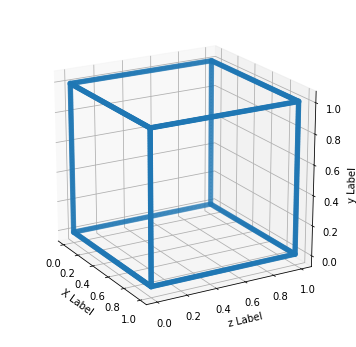

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(pts_np[:,0], pts_np[:,1], pts_np[:,2])

ax.set_xlabel('X Label')
ax.set_ylabel('z Label')
ax.set_zlabel('y Label')
ax.view_init(elev=20, azim=-30)
plt.show()

## 6.9.2 카메라와 이미지 평면

카메라의 단순화된 모델인 핀홀(pinhole) 카메라를 살펴보자
- 현장의 광자는 카메라 중심을 통해 직선으로 이동하는 경우에만 이미지 센서 어레이에 도달한다.
- 이미지 센서 어레이는 이미지 평면이라 불리는 평면에 위치해 있다.
- 광자가 부딪히는 센서 요소는 이미지 평면과 광자가 이동하는 직선 사이의 교좀에 위치한 센서 요소이다.

## 6.9.3 카메라 좌표계

- 현장의 점 p를 이미지 평면의 댕응하는 점 q의 픽셀 좌표로 매핑하는 함수를 표현할 수 있는 특별히 편리한 기저
 - 원점: 카메라 중심
 - $a_1$: 센서 요소의 맨 왼쪽 모서리에서 맨 위 오른쪽 모서리로 수평방향으로 향하는 벡터
 - $a_2$: 센서 요소의 맨 왼쪽 모서리에서 맨 아래쪽 모서리로 수직방향으로 향하는 벡터
 - $a_3$: 원점에서 센서 요소의 맨 위 왼쪽 모서리로 향하는 벡터
 - q의 좌표는 $\textbf{x}=(x_1,x_2,x_3)$이고, $q=x_1a_1+x_2a_2+x_3a_3$으로 표현된다.

In [2]:
def pixel(x): return (x[0], x[1])

## 6.9.4 현장의 카메라 좌표에서 이미지 평면 내 대응하는 점의 카메라 좌표로

현장좌표 p를 카메라 기저 벡터들의 션형결합으로 나타낼 수 있다.
$$p=x_1a_1+x_2a_2+x_3a_3$$
원점 $a_3$의 머리, q에 의해 형성되는 삼각형은 원점, $x_3a_3$머리, p의 의해 형성되는 삼각형을 축소한 형태이다. 따라서 q의 좌표는 아래와 같이 표현가능하다.
$$q=(x_1/x_3, x_2/x_3, x_3/x_3)$$

In [3]:
def scale_down(x): return list2vec([x[0]/x[2], x[1]/x[2], 1])

## 6.9.5 현장 좌표에서 카메라 좌표로

프레임 큐브의 점들을 카메라 좌표표현으로 매핑해보자. 첫 번째 단계로 형장 좌표의 (-1, -1, 8)카메라 중심을 갖는다. 카메라 좌표계를 (0,0,0)에 두고 와이어 프레임 큐브의 각 점에 (1, 1, 8)을 더하여 그 점들을 평행이동시킨다.

In [4]:
shifted_pts = [v + list2vec([1,1,8]) for v in pts]

두 번째 단계로 기저변경을 해야 한다. shifted_pts의 각 점에 대해, 카메라 기저에 대한 그 점의 좌표표현을 얻는다. 1x1 차원의 이미지 센서 어레이를 구성하는 100x100 픽셀이 있다고 생각해 보자. 그러면 기저 $a_1=[1/100, 0, 0], a_2=[0, 1/100, 0], a_3=[0, 0, 1]$이다.

In [5]:
from matutil import coldict2mat

def vec2rep(veclist, v):
    mat = coldict2mat(veclist)
    return mat*v

xpixels = 100
ypixels = 100
cb = [list2vec([1/xpixels,0,0]),
      list2vec([0,1/ypixels,0]),
      list2vec([0,0,1])]

reps = [vec2rep(cb, v) for v in shifted_pts]

## 6.9.6 픽셀 좌표로

다음으로, 이 점들을 이미지 평면으로 투영한 것을 구한다

In [6]:
in_camera_plane = [scale_down(u) for u in reps]

이 점들은 이미지 평면에 놓여 있으므로, 이 점을의 세 번째 좌표는 모두 1이고, 첫 번째 및 두 번째 좌표는 픽셀 좌표로 핵설할 수 있다.

In [7]:
pixels = [pixel(u) for u in in_camera_plane]

plotting

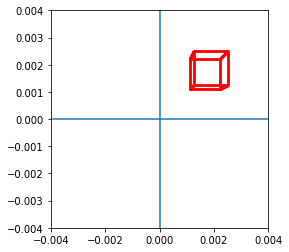

In [11]:
from plotting_matplotlib import plot
plot(pixels, scale=0.004)

# 6.10 기저를 찾는 것과 관련된 계산 문제

기저는 아주 유용하다. 벡터 공간 V를 명시하는 두 가지 방법이 있다.
- V에 대한 생성자들을 명시하기. 이것은 $V=Col A$를 만족하는 행렬 A를 명시하는 것과 같다.
- 해집합이 V인 동차 선형시스템을 명시하기. 이것은 $V=Null A$를 만족하는 행렬 A를 명시하는 것과 같다.

### Computational Problem 6.10.1
주어진 벡터들에 의해 생성되는 벡터공간의 기저 찾기
- input: 벡터들의 리스트 $[v_1,...,v_n]$
- output: $Span\{v_1,...,v_n\}$에 대한 기저를 형성하는 벡터들의 리스트
___
Lemma6.6.11의 방식을 이용하려면 어떤 벡터가 다른 벡터들의 생성 내에 있다는 것을 알 수 있는 방법이 있어야 가능하며, 이 질문에 대해 답하는 것 자체가 쉽지 않는 문제이다.

### Computational Problem 6.10.2
동차 선형시스템의 해집합의 기저 찾기
- input: 벡터들의 리스트 $[a_1,...,a_m]$
- output: 시스템 $a_1\cdot x=0,...,a_n\cdot x_n=0$의 해집합에 대한 기저를 형성하는 벡터들의 리스트
___
이 문제는 a를 row 벡터로 가지는 A의 영공간에 대한 기저를 찾는 것이다.

이 문제에 대한 알고리즘은 몇 가지 질문들에 대한 도움이 된다. 예를 들어, 기저를 가지는 것은 해집합이 자명한지를 알려 줄 것이다. 만약 기저가 공집합이 아니면 해집합은 자명하지 않는다.

# 6.11 교환(Exchange) 보조 정리

## 6.11.1 보조정리

### Lemma 6.11.1 (Exchange Lemma)
S는 벡터들의 집합이라 하고 A는 S의 부분집합이라 하자. z는 Span S의 벡터이고 $A\cup\{z\}$는 일차독립이라 하자. 그러면, $SpanS=Span(\{z\}\cup S-\{w\})$를 만족하는 벡터 $w\in S-A$가 존재한다.
___
집합 A는 특정 벡터들이 제거되는 것을 방지하는 데 사용된다.

## 6.11.2 MSF에 대한 Grow 알고리즘의 정확성에 대한 증명

$T^*$는 G에 대한 진정한 최소 가중치 스패닝트리라고 하고 T는 알고리즘에 의해 선택된 에지들의 집합이라 하자. $e_1,...,e_m$은 G의 에지들을 가중치가 높은 순서로 정열한 것이라고 하자. $e_k$는 T와 $T^*$에 있지 않는 최소 가중치 에지라 하자. 이것은 $e_1,...,e_{k-1}$은 모두 T와 $T^*$에 있음을 의미한다. 아래 두가지 경우를 살펴보자.
- Case 1: $e_k$는 $T^*$에 속하지만 T에는 속하지 않는다. $e_k$는 사이클을 형성하지 않아 해집합에 추가해야 하는지 이것은 모순이다.
- Case 2: $e_k$는 T에 속하지만 $T^*$에는 속하지 않는다. A는 $e_1,...,e_{k-1}$에 대응한 벡터로 구성하고 S는 $T^*$내의 모든 에지들에 대응하는 벡터로들로 구성된다고 하자. zSMS $e_k$에 대응하는 벡터라 하자. 알고리즘이 $e_k$를 포함하므로 $A\cup \{z\}$는 일차독립이다. 그러므로 교환 Lemma에 의하면 다음을 만족하는 벡터 w가 S-A내에 존재한다.
$$SpanS=Span(S\cup \{z\}-\{w\})$$
$$\quad\quad\quad=Span(T^*\cup\{e_k\}-\{e_n\})$$
하지만 $e_k$는 $e_n$보다 낮은 가중치를 가지고 있으므로 $T^*$가 최소 가중치 스패닝트리가 아님을 보여 주는데 이것은 모순이다.

# 6.12 Lab: 원근감 수정(Perspective rectification)

이 Lab의 목적은 평평한 표면으 이미지에서 원근감을 제거하는 것이다.
- 두 개의 좌표계를 고려해야 하며 한 좌표표현과 다른 좌표표현 사이의 변화를 필요로 한다.
- 원근감이 없는 이미지는 픽셀 좌표를 화이트보드 내 평면의 대응하는 점의 좌표로 매핑하는 함수가 있으면 쉽게 만들수 있다.

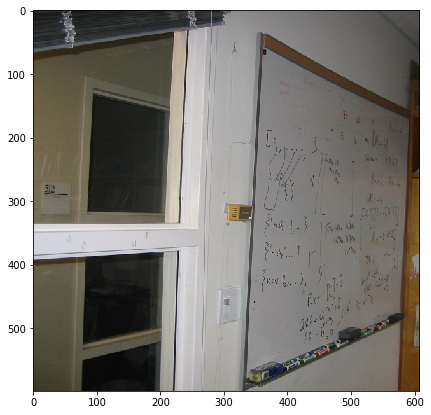

In [90]:
import matplotlib.pyplot as plt
from skimage.io import imread

img = imread('./board.png')
plt.figure(figsize=(7,7))
plt.imshow(img)
plt.show()

## 6.12.1 카메라 기저

- 원점: 카메라 중심
- $a_1$: 센서 요소의 맨 위 왼쪽 모서리에서 맨 위 오른쪽 모서리로 향하는 수평방향 벡터
- $a_2$: 센서 요소의 맨 위 왼쪽 모서리에서 맨 위 아래쪽 모서리로 향하는 수직방향 벡터
- $a_3$: 원점에서 센서 요소의 맨 위 왼쪽 모서리 (0,0)으로 향하는 벡터
- 이 기저는 센소 요소의 맨 위 왼쪽 모서리 ($x_1,x_2$)가 좌표표현 ($x_1,x_2$,0)을 지닌다는 이점이 있다.

## 6.12.2 화이트보드 기저

- 원점: 카메라 중심
- $c_1$: 화이트보드 요소의 맨 위 왼쪽 모서리에서 맨 위 오른쪽 모서리로 향하는 수평방향 벡터
- $c_2$: 와이트보드 요소의 맨 위 왼쪽 모서리에서 맨 위 아래쪽 모서리로 향하는 수직방향 벡터
- $c_3$: 원점에서 화이트보드 요소의 맨 위 왼쪽 모서리 (0,0)으로 향하는 벡터

## 6.12.3 픽셀에서 화이트보드상의 점으로 매핑하기

기저변경이 이러한 함수의 핵심이다.

어떤 점에 대해 카메라 좌표계와 화이트보드 좌표계의 표현이 주어진다.


1. 픽셀 좌표에서 카메라 좌표: 픽셀좌표($x_1,x_2$) --> 카메라좌표($x_1,x_2$, 1)
2. 공간의 점 q의 화이트보드 좌표에서 화이트보드 상의 대응하는 점 p의 화이트 좌표: q($y_1,y_2,y_3$) --> p($y_1/y_3,y_2/y_3,y_3/y_3$)

좌표표현의 정의역
- 카메라 좌표표현 정의역 $C=\{x_1,x_2,x_3\}$
- 화이트보드 좌표표현 정의역 $R=\{y_1,y_2,y_3\}$

다음 스펙을 가지는 함수 $f:\mathbb{R^C}\rightarrow\mathbb{R^R}$을 유도하고자 한다.
- input: 어떤 점 q의 카메라 좌표에 대한 좌표표현 x
- output: 원점과 q를 지나는 직선의 화이트보드 평면과 p에서 교차하는 그러한 점 p의 화이트보드 좌표에 대한 좌표표현 y

함수 $f$를 두 함수의 합성함수 $f=g\circ h$로 나타낼 것이다.
- $h:\mathbb{R^C}\rightarrow\mathbb{R^R}$
 - input: 카메라 기저에 대한 어떤 점의 좌표표현
 - output: 화이트보드 기저에 대한 동일한 점의 좌표표현
- $g:\mathbb{R^R}\rightarrow\mathbb{R^R}$
 - input: 어떤 점 q의 화이트보드 좌표에 대한 좌표표현
 - output: 원점과 q를 지나는 직선은 화이트보드 평면의 점 p에서 교차하는 그러한 점의 p의 화이트보드 좌표에 대한 좌표표현

## 6.12.4 화이트보드상에 있지 않는 점을 화이트보드상의 점으로 매핑하기

화이트보드상의 점의 좌표 $y_3$은 1이 되도록 화이트보드 좌표계를 디자인한다.

q의 화이트보드 좌표표현을 $(y_1,y_2,y_3)$이라고 하자. 기본적인 기하학적 추론에 의하면 점 p의 화이트 좌표표현은 $(y_1/y_3,y_2/y_3,y_3/y_3)$이다.

### Task 6.12.1 
프로시저 move2board(y)을 작성해 보자.
- input: 점 q의 화이트보드 좌표표현인 $\{y_1,y_2,y_3\}$-벡터 y
- output: 점 p의 화이트보드 좌표표현인 $\{y_1,y_2,y_3\}$-벡터 z

In [17]:
from vec import Vec

def move2board(y):
    return Vec(y.D, {d:y[d]/y['y3'] for d in y.D})

## 6.12.5 기저변경 행렬

$\begin{bmatrix} q\end{bmatrix} = \begin{bmatrix} a_1 | a_2 | a_3 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \\ x_3\end{bmatrix}=\begin{bmatrix} c_1 | c_2 | c_3 \end{bmatrix}\begin{bmatrix} y_1 \\ y_2 \\ y_3\end{bmatrix}$

$A=\begin{bmatrix} a_1 | a_2 | a_3 \end{bmatrix}, C=\begin{bmatrix} c_1 | c_2 | c_3 \end{bmatrix}$

$Ax=Cy$

$C^{-1}Ax=y$

$Hx=y$

$\begin{bmatrix} H\end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \\ x_3\end{bmatrix}=\begin{bmatrix} y_1 \\ y_2 \\ y_3\end{bmatrix}$

## 6.12.6 기저변경 행렬 계산하기

$H=\begin{bmatrix} h_{y_1x_1} && h_{y_1x_2} && h_{y_1x_3} \\ h_{y_2x_1} && h_{y_2x_2} && h_{y_2x_3} \\ h_{y_3x_1} && h_{y_3x_2} && h_{y_3x_3} \end{bmatrix}$

q는 이미지 평면의 점이라고 하자. 만약 q가 픽셀 $x_1,x_2$의 맨위 왼쪽 모서리라면 그 카메라의 좌표는 $x_1,x_2,1$이고, 다음과 같이 쓸 수 있다.

$\begin{bmatrix} y_1 \\ y_2 \\ y_3\end{bmatrix}=\begin{bmatrix} h_{y_1x_1} && h_{y_1x_2} && h_{y_1x_3} \\ h_{y_2x_1} && h_{y_2x_2} && h_{y_2x_3} \\ h_{y_3x_1} && h_{y_3x_2} && h_{y_3x_3} \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \\ 1\end{bmatrix}$

곱셈을 전개하면 3개의 션형방정식을 얻을 수 있으면, 이러한 세 점을 사용하면 9개의 선형방정식을 얻을 수 있어서 H를 풀 수 있을 것이다. 문제는 이러한 점들에 대한 화이트보드 좌표를 모른다는 것이다. 하지만 유사한 방식을 사용하여 $f(x)=y$를 만족하는 입력-출력 쌍들로부터 함수 $f$에 대해 알 수 있다.

점 q에 대한 화이트보드상의 점 p($w_1,w_2$)에 대해 아래와 같이 표현할 수 있다.

$f([x_1,x_2,1])=[w_1,w_2,1])$

$w_1=y_1/y_3$

$w_2=y_2/y_3$

이 식을 H에 대해서 전개하면 아래와 같이 2개의 선형방정식을 얻을 수 있다.

$(w_1x_1)h_{y3,x1}+(w_1x_2)h_{y3,x2}+w_1h_{y3,x3}-x_1h_{y1,x1}-x_2h_{y1,x2}-h_{y1,x3}=0$

$(w_2x_1)h_{y3,x1}+(w_2x_2)h_{y3,x2}+w_2h_{y3,x3}-x_1h_{y2,x1}-x_2h_{y2,x2}-h_{y2,x3}=0$

### Task 6.12.2 
정의역 $D=RxC$라고 정의하자. 두 개의 D-벡터 u와 v로 구성되는 리스트 [u,v]를 출력하는 프로시저, make_equations(x1,x2,w1,w2)를 작성해 보자.

In [111]:
import itertools

def make_equations(x1, x2, w1, w2):
    D = set([d for d in itertools.product(['y1', 'y2', 'y3'], ['x1', 'x2', 'x3'])])
    u = Vec(D, {('y3','x1'): w1*x1, ('y3','x2'): w1*x2, ('y3','x3'): w1, 
                ('y1','x1'): -x1, ('y1','x2'): -x2, ('y1','x3'): -1})
    v = Vec(D, {('y3','x1'): w2*x1, ('y3','x2'): w2*x2, ('y3','x3'): w2,
                ('y2','x1'): -x1, ('y2','x2'): -x2, ('y2','x3'): -1})
    return [u, v]

___
$f$의 입력-출력쌍만을 사용하여 H를 정확히 알아내는 것은 기대할 수는 없다. $\hat H$을 위의 방정식을 만족하는 행렬이라고 해보자.
$$g(\hat Hx)=f(x)$$
행렬-벡터 곱셈의 대수적 성질에 의해,
$$(\alpha\hat H)x=\alpha(\hat H x)$$
$g$는 세 번째 엔트리로 첫 번째와 두 번째를 나누므로, 세 엔트리 모두에 $\alpha$를 곱하는 것은 g의 출력을 바꾸지 않는다. 
$$g(\alpha\hat Hx)=g([\alpha y_1,\alpha y_2,\alpha y_3]))=g([y_1, y_2, y_3])$$
이것은 만약 $\hat H$가 H에 적합한 행렬이면, $\alpha\hat H$도 적합한 행렬임을 보여 준다. 이 결과는 이미지로부터 화이트보드의 크기(scale)를 알아낼 수 없음을 의미한다.

어떤 행렬 H를 정확하기 알아내기 위해 스케일링 식(scaling equation)을 부여해 보자. 단순히 어떤 엔트리, 예를 들어 ('y1','x1') 엔트리는 1과 같아야 한다고 해보자. 이것은 $w\cdot h=1$로서 나타낼 것이다.

### Task 6.12.3
('y1', 'x1')엔트리는 1인 D-벡터 w를 작성해 보자.

In [29]:
D = set([d for d in itertools.product(['y1', 'y2', 'y3'], ['x1', 'x2', 'x3'])])
w = Vec(D, {('y1','x1'): 1})

### Task 6.12.4
이미지에서 화이트보드의 모서리들에 대한 픽좌표를 이용하여 H를 구해보자.

L 
       ('y1', 'x1') ('y1', 'x2') ('y1', 'x3') ('y2', 'x1') ('y2', 'x2') ('y2', 'x3') ('y3', 'x1') ('y3', 'x2') ('y3', 'x3')
     ----------------------------------------------------------------------------------------------------------------------
 0  |          -358          -36           -1            0            0            0            0            0            0
 1  |             0            0            0         -358          -36           -1            0            0            0
 2  |          -329         -597           -1            0            0            0            0            0            0
 3  |             0            0            0         -329         -597           -1          329          597            1
 4  |          -592         -157           -1            0            0            0          592          157            1
 5  |             0            0            0         -592         -157           -1            0            0            0
 6  |

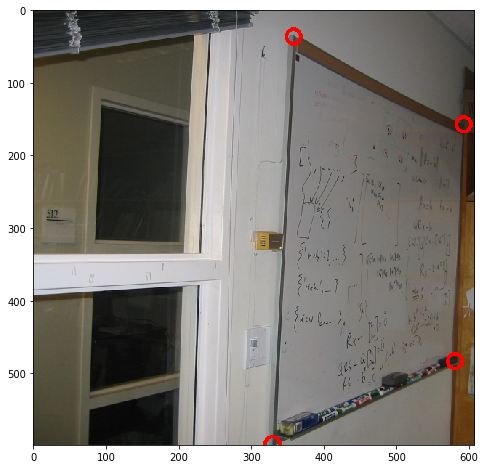

In [112]:
from mat import Mat
from matutil import rowdict2mat
from solver import solve
import cv2

lt = (358, 36)
lb = (329, 597)
rt = (592, 157)
rb = (580, 483)

L = []
L.append(make_equations(lt[0], lt[1], 0, 0))
L.append(make_equations(lb[0], lb[1], 0, 1))
L.append(make_equations(rt[0], rt[1], 1, 0))
L.append(make_equations(rb[0], rb[1], 1, 1))
L = sum(map(list, L), [])
L.append(w)
L = rowdict2mat(L)

b = Vec(set(range(9)), {8: 1})

h = solve(L, b)
H = Mat(({'y1', 'y2', 'y3'}, {'x1', 'x2', 'x3'}), {d: h[d] for d in h.D})

print('L', L)
print('\nb', b)
print('\nH', H)

draw_img = img.copy()
draw_img = cv2.circle(draw_img, lt, 10, color=[255,0,0], thickness=3)
draw_img = cv2.circle(draw_img, rt, 10, color=[255,0,0], thickness=3)
draw_img = cv2.circle(draw_img, lb, 10, color=[255,0,0], thickness=3)
draw_img = cv2.circle(draw_img, rb, 10, color=[255,0,0], thickness=3)

plt.figure(figsize=(8,8))
plt.imshow(draw_img)
plt.show()

## 6.12.7 이미지 표현

이미지는 위치행렬과 컬러행렬로 표현되고, 아래 두 프로시저를 이용할 것이다.
- file2mat(filename, rowlabels)
- mat2display()

## 6.12.8 원금감이 없는 이미지 합성

### Task 6.12.5
이미지 파일 board.png에서 일바화된 이미지를 구성해 보자.

In [100]:
from image_mat_util import file2mat
from image_mat_util import mat2display

(X_pts, colors) = file2mat('board.png', ('x1', 'x2', 'x3'))

### Task 6.12.6
행렬 X_pts의 열들은 이미지 내 점들의 카메라 좌표표현이다. 이러한 점들에 대한 화이트보드 좌표표현을 계산해보자.

In [113]:
Y_pts = H*X_pts

### Task 6.12.7
Y_pts는 점 $q(y_1, y_2, y_3)$를 제공한다. 이를 화이트보드를 포함하는 평면의 대응하는 점 p의 화이트보드 좌표표현 $(y_1/y_3, y_2/y_3, 1)을 제공해보자. 다음 스페을 가지는 프로시저, mat_move2board(Y)를 작성해 보자.
- input: 행렬 Mat. 이 행렬의 각 열은 점 q의 화이트보드 좌표를 제공하는 'y1', 'y2', 'y3'-벡터이다.
- output: 행렬 Mat. 이 행렬의 각 열은 화이트보드 평면의 대응하는 점(원점과 q를 지나는 직선이 화이트보드 평면과 교차하는 점)dlek.

In [114]:
from matutil import mat2coldict
from matutil import coldict2mat

def mat_move2board(Y):
    y = mat2coldict(Y)
    y = {d:move2board(y[d]) for d in y.keys()}
    return coldict2mat(y)

Y_in = Mat(({'y1', 'y2', 'y3'}, {0,1,2,3}),
            {('y1',0):2, ('y2',0):4, ('y3',0):8,
            ('y1',1):10, ('y2',1):5, ('y3',1):5,
            ('y1',2):4, ('y2',2):25, ('y3',2):2,
            ('y1',3):5, ('y2',3):10, ('y3',3):4})

print(Y_in)
print(mat_move2board(Y_in))


        0  1  2  3
      ------------
 y1  |  2 10  4  5
 y2  |  4  5 25 10
 y3  |  8  5  2  4


           0 1    2    3
      ------------------
 y1  |  0.25 2    2 1.25
 y2  |   0.5 1 12.5  2.5
 y3  |     1 1    1    1



In [115]:
Y_board = mat_move2board(Y_pts)

### Task 6.12.8 
마지막으로, 결과를 표시해 보자.

In [128]:
mat2display(Y_board, colors, ('y1', 'y2', 'y3'), scale=300, xmin=None, ymin=None)

Hit Enter once the image is displayed.... 


### Task 6.12.9
cit.png에도 적용해 보자.

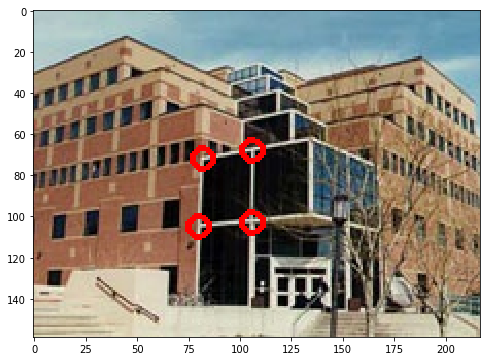

In [132]:
from mat import Mat
from matutil import rowdict2mat
from solver import solve
import cv2

lt = (82, 72)
lb = (80, 105)
rt = (106, 68)
rb = (106, 103)

L = []
L.append(make_equations(lt[0], lt[1], 0, 0))
L.append(make_equations(lb[0], lb[1], 0, 1))
L.append(make_equations(rt[0], rt[1], 1, 0))
L.append(make_equations(rb[0], rb[1], 1, 1))
L = sum(map(list, L), [])
L.append(w)
L = rowdict2mat(L)

b = Vec(set(range(9)), {8: 1})

h = solve(L, b)
H = Mat(({'y1', 'y2', 'y3'}, {'x1', 'x2', 'x3'}), {d: h[d] for d in h.D})

img = imread('cit.png')
draw_img = img.copy()
draw_img = cv2.circle(draw_img, lt, 5, color=[255,0,0], thickness=2)
draw_img = cv2.circle(draw_img, rt, 5, color=[255,0,0], thickness=2)
draw_img = cv2.circle(draw_img, lb, 5, color=[255,0,0], thickness=2)
draw_img = cv2.circle(draw_img, rb, 5, color=[255,0,0], thickness=2)

plt.figure(figsize=(8,8))
plt.imshow(draw_img)
plt.show()

In [136]:
(X_pts, colors) = file2mat('cit.png', ('x1', 'x2', 'x3'))
Y_pts = H*X_pts
Y_board = mat_move2board(Y_pts)

mat2display(Y_board, colors, ('y1', 'y2', 'y3'), scale=100, xmin=None, ymin=None)

Hit Enter once the image is displayed.... 


# 6.13 Review questions

### 좌표표현은 무엇인가?

- 벡터공간 V에 대한 좌표계는 V의 생성자 $a_1, ..., a_n$에 의해 명시된다. V내의 모든 벡터 v는 선형결합으로 나타낼 수 있다.
$$v=\alpha_1a_1+...+\alpha_na_n$$
- 계수들은 *좌표*라고 하고 벡터 $[\alpha_1,...,\alpha_n]$은 $a_1,...,a_n$에 대한 v의 *좌표표현*이라고 한다.

### 벡터와 그 벡터에 대한 행렬을 사용한 좌표표현 사이의 변환은 어떻게 표현될 수 있는가?

좌표축이 $a_1,...,a_n$이라고 해보자. 행렬 $A=\begin{bmatrix}  & &   \\ a_1 & ...  & a_n\\ & & & \end{bmatrix}$을 구성해 보자. 이때, 이 행렬의 열들은 생성자이다.
- "u는 $a_1,...,a_n$에 대한 v의 좌표표현이다."라는 것을 행렬-벡터 방정식으로 쓸 수 있다.
$$Au=v$$

### 벡터들의 집합이 일차독립이란 것을 어떻게 증명할 수 있는가?

벡터들의 집합이 만약 영벡터와 동일한 유일한 선형결합이 자명한(trivial) 선형결합이면 일차독립이다.

### Grow 알고리즘은 무엇인가?

def Grow(V)

$\quad B=\emptyset$

$\quad$ repeat while possible:

$\quad\quad$  find a vector v in V that is not in Span B, and put it in B

### Shirnk 알고리즘은 무엇인가?

def Shrink(V)

$\quad$ B=some find finite set of vectors that spans V

$\quad$ repeat while possible:

$\quad\quad$  find a vector v in B such $Span(B-{v})=V$, and remove v from B

### 일차종속과 스패닝(spanning)의 개념을 어떻게 그래프의 에지들의 부분집합에 적용할 수 있는가?

D는 노드들의 집합이라 하자. D의 부분집합은 대응하는 엔드리들은 1이고 다른 엔트리들은 0인 벡터에 의해 표현된다(GF(2)).
각 에지는 D의 2-원소 부분집합이고 그래서 어떤 벡터, 즉 e의 양 끝은 1이고 다른 곳은 0인 벡터에 의해 표현된다.
일반적으로, 엔트리 x와 y가 1인 벡터는 그래프의 x에서 y로의 경로를 형서하는 에지들에 대응하는 벡터들의 합이다. 따라서 이러한 벡터들에 대해서는 하나의 벡터가 어떤 다른 벡터들에 생성에 속하는지 쉽게 알아낼 수 있다. 즉 에지들의 선형결합으로 1인 나오는 엔트리들은 서로 연결되어 있다.
사이클을 형성하는 에지들에 대응하는 벡터들을 더하면 영벡터를 얻을 수 있다. 즉 사이클을 형성하면 일차종속이다. 사이클을 형성하지 않으면 일차독립이다.

### 왜 Glow 알고리즘의 출력이 일차독립인 벡터들의 집합인가?

귀납법으로 증명

$v_n$은 n번째 이터레이션에 B에 추가된 벡터라 하자.

n=0인 경우, 추가된 벡터는 없고 당연히 일차독립이다.

n=k-1에 대해 일차독립이라는 것이 사실이라고 가정하고 n=k인 경우에 대해 증명해보자.

B에 추가된 벡터 $v_k$는 B의 벡터들의 생성 내에 있지 않다. 

$0=\alpha_1v_1+...+\alpha_{k-1}v_{k-1}+\alpha_kv_k$

따라서 $\alpha_k$는 0으로 아래와 같이 표현할 수 있고,

$0=\alpha_1v_1+...+\alpha_{k-1}v_{k-1}$

$v_1,...,v_{k-1}$는 일차독립이므로 위의 $\alpha_1,...,\alpha_{k-1}$는 0이다. 

0벡터와 동일하게 되는 유일한 선형결합은 자명한 선형결합이다.

### 왜 Shrink 알고리즘 출력이 일차독립인 벡터들의 집합인가?

결과 B 집합이 일차종속이라고 가정해 보자.

$0=\alpha_1v_1+...+\alpha_nv_n$

이때, 계수들 중 적어도 하나는 0이 아니다. 일차 종속에 의하면 Superfluous-Vector Lemma에 의해 $Span(B-\{v_i\})=SpanB$이므로 $v_i$는 제거되어야하는데 제거되지 않았기 때문에 모순이다.

따라서 결과 B집합은 일차독립니다.

### 기저는 무엇인가?

V는 벡터 공간이라 하자. V에 대한 기저(basis)는 V에 대한 생성자들로 구성된 일차독립 집합이다.

### 고유표현(unique representation)은 무엇인가?

$a_1,...,a_n$은 벡터공간 V에 대한 기저라고 하자. 임의의 벡터 $v\in V$에 대해, v의 기저 벡터들에 대한 표현은 정확하게 하나만 존재한다.

### 기저변경은 무엇인가?

기저변경은 하나의 기저에 대한 어떤 벡터의 좌표표현을 또 다른 기저에 대한 동일한 벡터의 좌표표현으로 바꾸는 것이다.

### 교환 Lemma는 무엇인가?

S는 벡터들의 집합이라 하고 A는 S의 부분집합이라 하자. z는 Span S의 벡터이고 $A\cup\{z\}$는 일차독립이라 하자. 그러면, $SpanS=Span(\{z\}\cup S-\{w\})$를 만족하는 벡터 $w\in S-A$가 존재한다.
___
집합 A는 특정 벡터들이 제거되는 것을 방지하는 데 사용된다.

# 6.14 Problems

### Problem 6.14.1
다음 각 벡터를 V의 생성자들의 선형결합으로 나타내어 그것이 V에 속한다는 것을 보여라.

In [15]:
import numpy as np
V = np.array([[2,0,4,0],[0,1,0,1],[0,0,-1,-1]])

In [16]:
# (a) [2,1,4,1]
V[0]+V[1]

array([2, 1, 4, 1])

In [17]:
# (b) [1,1,1,0]
1/2*V[0]+V[1]+V[2]

array([ 1.,  1.,  1.,  0.])

In [18]:
# (c) [0,1,1,2]
V[1]-V[2]

array([0, 1, 1, 2])

### Prbolem 6.14.2
다음 벡터를 V의 생성자들의 선형결합으로 나타내어 그것이 V에 속한다는 것을 보여라

In [20]:
V = np.array([[0,0,1], [2,0,1], [4,1,2]])

In [21]:
# (a) [2,1,4]
3*V[0]-V[1]+V[2]

array([2, 1, 4])

In [23]:
# (b) [1,1,1]
1/2*V[0] - 3/2*V[1] + V[2]

array([ 1.,  1.,  1.])

In [25]:
# (c) [5,4,3]
1/2*V[0] - 11/2*V[1] + 4*V[2]

array([ 5.,  4.,  3.])

In [27]:
# (d) [0,1,1]
V[0] - 2*V[1] + V[2]

array([0, 1, 1])

### Problem 6.14.3
GF(2)상의 다음 벡터들에 대해, 각 벡터를 V의 생성자들의 선형결합으로 나타냄으로써 그것이 V에 속한다는 것을 보여라.

In [29]:
from GF2 import one
V = np.array([[0, one, 0, one], [0, 0, one, 0], [one, 0, 0, one], [one, one, one, one]])

In [30]:
# (a) [1,1,1,0]
V[0] + V[2]

array([one, one, 0, 0], dtype=object)

In [31]:
# (b) [1,0,1,0]
V[0] + V[3]

array([one, 0, one, 0], dtype=object)

In [32]:
# (c) [1,0,0,0]
V[0] + V[1] + V[3]

array([one, 0, 0, 0], dtype=object)

### Problem 6.14.4
그래프를 나타내는 GF(2)상의 벡터들에 대해, 각 벡터를 위 벡터들의 선형결합으로 나타냄으로써 그것이 벡터들의 생성에 속한다는 것을 보여라.

In [111]:
v1 = np.array([one, one,   0,   0,   0,   0,   0,   0])
v2 = np.array([  0, one, one,   0,   0,   0,   0,   0])
v3 = np.array([one,   0,   0, one,   0,   0,   0,   0])
v4 = np.array([  0, one,   0,   0, one,   0,   0,   0])
v5 = np.array([  0,   0, one,   0, one,   0,   0,   0])
v6 = np.array([  0,   0,   0, one, one,   0,   0,   0])
v7 = np.array([  0,   0,   0,   0,   0, one,   0, one])
v8 = np.array([  0,   0,   0,   0,   0,   0, one, one])

In [38]:
# (a) [0,0,1,1,0,0,0,0]
v2+v4+v6

array([0, 0, one, one, 0, 0, 0, 0], dtype=object)

In [39]:
# (b) [0,0,0,0,0,1,1,0]
v7+v8

array([0, 0, 0, 0, 0, one, one, 0], dtype=object)

In [40]:
# (c) [1,0,0,0,1,0,0,0]
v1+v4

array([one, 0, 0, 0, one, 0, 0, 0], dtype=object)

In [41]:
# (d) [0,1,0,1,0,0,0,0]
v4+v6

array([0, one, 0, one, 0, 0, 0, 0], dtype=object)

### Problem 6.14.5
아래의 각 부분에 대해, 영벡터를 벡터들의 자명하지 않는 선형결합으로 나타탬으로써 $\mathbb R$상의 주어진 벡터들의 일차종속임을 보여주자.

In [44]:
# (a)
v1 = np.array([1,2,0])
v2 = np.array([2,4,1])
v3 = np.array([0,0,-1])

-2*v1 + v2 + v3

array([0, 0, 0])

In [46]:
# (b)
v1 = np.array([2,4,0])
v2 = np.array([8,16,4])
v3 = np.array([0,0,7])

-4*v1 + v2 - 4/7*v3

array([ 0.,  0.,  0.])

In [82]:
# (c)
v1 = np.array([0,0,5])
v2 = np.array([1,34,2])
v3 = np.array([123,456,789])
v4 = np.array([-3,-6,0])
v5 = np.array([1,2,0.5])

-0.3*v1 + v4 + 3*v5

array([ 0.,  0.,  0.])

### Problem 6.14.6 
아래의 각 부분에 대해, 영벡터를 벡터들의 자명하지 않는 선형결합으로 나타탬으로써 $\mathbb R$상의 주어진 벡터들의 일차종속임을 보여주자.

In [84]:
v1 = np.array([1,2,3])
v2 = np.array([4,5,6])
v3 = np.array([1,1,1])

-v1 + v2 - 3*v3

array([0, 0, 0])

In [89]:
from math import pi
from math import sqrt

v1 = np.array([0,-1,0,-1])
v2 = np.array([pi,pi,pi,pi])
v3 = np.array([-sqrt(2),sqrt(2),-sqrt(2),sqrt(2)])

2*sqrt(2)*v1 + sqrt(2)/pi*v2 + v3

array([ 0.,  0.,  0.,  0.])

In [91]:
v1 = np.array([1,-1,0,0,0])
v2 = np.array([0,1,-1,0,0])
v3 = np.array([0,0,1,-1,0])
v4 = np.array([1,0,0,1,-1])
v5 = np.array([1,0,0,0,1])

v1 + v2 + v3 + v4 + v5

array([3, 0, 0, 0, 0])

### Problem 6.14.7
아래 벡터들 중 하나는 다른 두 벡터들의 선형결합으로 포현함으로써 필요하지 않음(superfluous)을 보여라.

In [94]:
u = np.array([3,9,6,5,5])
v = np.array([4,10,6,6,8])
w = np.array([1,1,0,1,3])

-u + v == w

array([ True,  True,  True,  True,  True], dtype=bool)

### Problem 6.14.8
4개의 벡터들은 일차종속이지만 그중 임의의 3개는 일차독립인 그러한 4개의 벡터를 제시해 보자.

In [102]:
v1 = np.array([1,1,0,0])
v2 = np.array([0,1,1,0])
v3 = np.array([0,0,1,1])
v4 = np.array([1,0,0,1])

# linear dependency
v2-v3+v4 == v1

# linear independency
-v2+v3 == v4

array([False, False,  True,  True], dtype=bool)

### Problem 6.14.9
아래의 각 부분에 대해, 영벡터를 벡터들의 자명하지 않는 선형결합으로 나타냄으로써 GF(2)상의 주어진 벡터들이 일차종속임을 보여주자.

In [103]:
# (a)
v1 = np.array([one, one, one, one])
v2 = np.array([one, 0, one, 0])
v3 = np.array([0, one, one, 0])
v4 = np.array([0, one, 0, one])

v1+v2+0*v3+v4

array([0, 0, 0, 0], dtype=object)

In [108]:
# (b)
v1 = np.array([0, 0, 0, one])
v2 = np.array([0, 0, one, 0])
v3 = np.array([one, one, 0, one])
v4 = np.array([one, one, one, one])

0*v1 + v2 + v3 + v4

array([0, 0, 0, 0], dtype=object)

In [109]:
v1 = np.array([one, one, 0, one, one])
v2 = np.array([0, 0, one, 0, 0])
v3 = np.array([0, 0, one, one, one])
v4 = np.array([one, 0, one, one, one])
v5 = np.array([one, one, one, one, one])

v1+v2+v5

array([0, 0, 0, 0, 0], dtype=object)

### Problem 6.14.10
아래의 각 부분은 Problem 6.14.4에 명신된 GF(2)상의 벡터들 중 일부를 명시한다. 합이 영벡터인 그러한 벡터들의 부분집합을 제시함으로써 이 벡터들은 일차종속임을 보여주자.

In [112]:
v1 = np.array([one, one,   0,   0,   0,   0,   0,   0])
v2 = np.array([  0, one, one,   0,   0,   0,   0,   0])
v3 = np.array([one,   0,   0, one,   0,   0,   0,   0])
v4 = np.array([  0, one,   0,   0, one,   0,   0,   0])
v5 = np.array([  0,   0, one,   0, one,   0,   0,   0])
v6 = np.array([  0,   0,   0, one, one,   0,   0,   0])
v7 = np.array([  0,   0,   0,   0,   0, one,   0, one])
v8 = np.array([  0,   0,   0,   0,   0,   0, one, one])

In [115]:
# (a) {v1, v2, v3, v4, v5}
v2 + v4 + v5

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

In [118]:
# (b) {v1, v2, v3, v4, v5, v7, v8}
v1+v3+v4+v6

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

In [119]:
# (C) {v1, v2, v3, v4, v6}
v1+v3+v4+v6

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

In [121]:
# (d) {v1, v2, v3, v5, v6, v7, v8}
v1+v2+v5+v6+v3

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

### Problem 6.14.11
$S=\{[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]\}, A=\{[1,0,0,0,0],[0,1,0,0,0]\}$이라고 하자. 다음 각 벡터 z에 대해, $SpanS=Span(S\cup \{z\}-\{w\})$을 만족하는 S-A내의 벡터 w를 찾아보자.

(a)

z = [1,1,1,1,1]

w = [0,0,1,0,0] or [0,0,0,1,0] or [0,0,0,0,1]

(b)

z = [0,1,0,1,0]

w = [0,0,0,1,0] 

(c)

z = [1,0,1,0,1]

w = [0,0,1,0,0] or [0,0,0,0,1]

### Problem 6.14.12
$S=\{v_1, v_2, v_3, v_4\}$라고 하자. 다음의 각 부분은 $A\cup\{z\}$가 일차독립인 그러한 S의 부분집합 A와 벡터 z를 명시하낟. 각 부분에 대해, $SpanS=Span(S\cup \{z\}-\{w\})$을 만족하는 S-A내의 벡터 w를 찾아보자.

(a) A = {$v_1, v_2$}, z: d, e, $\quad$ answer: $v_3$

(b) A = {$v_2, v_3$}, z: c, d, $\quad$ answer: $v_1$

(c) A = {$v_2, v_3$}, z: a, e, $\quad$ answer: $v_1$ or $v_4$ 

### Problem 6.14.13
다음 스펙을 가지는 프로시저 rep2vec(u, veclist)을 작성해 보자.
- input: 벡터 u와 $Vecs[a_0,...,a_{n-1}]$의 리스트 veclist. u의 정의역은 {0,1,2,n-1}이고 n은 veclist의 길이다.
- output: u가 $a_0,...,a_{n-1}$에 대한 v의 좌표표현이 되는 벡터 v. 여기서, u의 엔트리 i는 i=0,1,2,...n-1인 경우에 $a_i$의 계수이다.

In [2]:
from matutil import coldict2mat
from vec import Vec
from vecutil import list2vec
from GF2 import one

def rep2vec(u, veclist):
    mat = coldict2mat(veclist)
    return mat*u
    
a0 = Vec({'a', 'b', 'c', 'd'}, {'a':1})
a1 = Vec({'a', 'b', 'c', 'd'}, {'b':1})
a2 = Vec({'a', 'b', 'c', 'd'}, {'c':1})
print(rep2vec(Vec({0,1,2},{0:2, 1:4, 2:6}), [a0, a1, a2]))

veclist = []
veclist.append(list2vec([1,0,2,0]))
veclist.append(list2vec([1,2,5,1]))
veclist.append(list2vec([1,5,-1,3]))
u = list2vec([5,3,-2])
print(rep2vec(u, veclist))

veclist = []
veclist.append(list2vec([one,0,one]))
veclist.append(list2vec([one,one,0]))
veclist.append(list2vec([0,0,one]))
u = list2vec([one,one,0])
print(rep2vec(u, veclist))


 a b c d
--------
 2 4 6 0

 0  1  2  3
-----------
 6 -4 27 -3

 0   1   2
----------
 0 one one


### Problem 6.14.14 
다음 스펙을 가지는 프로시저 vec2rep(veclist, v)을 작성해 보자.
- input: 벡터들 $[a_0,...,a_{n-1}]$의 리스트 veclist. v의 정의역은 {0,1,2,n-1}이고 n은 veclist의 길이다.
- output: 벡터 u. 이 벡터의 $a_0,...,a_{n-1}$에 대한 좌표표현은 v이다.

In [3]:
from solver import solve

def vec2rep(veclist, v):
    mat = coldict2mat(veclist)
    return solve(mat, v)
    
    
a0 = Vec({'a', 'b', 'c', 'd'}, {'a':1})
a1 = Vec({'a', 'b', 'c', 'd'}, {'b':1})
a2 = Vec({'a', 'b', 'c', 'd'}, {'c':1})
print(vec2rep([a0, a1, a2], Vec({'a', 'b', 'c', 'd'}, {'a':3, 'c':-2})))

veclist = []
veclist.append(list2vec([1,0,2,0]))
veclist.append(list2vec([1,2,5,1]))
veclist.append(list2vec([1,5,-1,3]))
v = list2vec([6,-4,27,-3])
print(vec2rep(veclist, v))

veclist = []
veclist.append(list2vec([one,0,one]))
veclist.append(list2vec([one,one,0]))
veclist.append(list2vec([0,0,one]))
v = list2vec([0,one,one])
print(vec2rep(veclist, v))


 0 1  2
-------
 3 0 -2

 0 1  2
-------
 5 3 -2

   0   1 2
----------
 one one 0


### Problem 6.14.15 
다음 스펙을 가지는 프로시저, is_superfluous(L, i)을 작성하고 테스트해 보자.
- input: 벡터들의 리스트 L, {0, 1,...n-1}의 정수 i, 여기서, n=len(L)이다.
- output: 참, 만약 L 내 벡터들의 생성이 다음 생성과 같으면 L[0], L[1], ..., L[i-1], L[i+1],...,L[n-1]

In [20]:
def is_zero(v):
    if v*v < 1e-14:
        return True
    else:
        return False

def is_superfluous(L, i):
    if len(L) is 1:
        return False
    
    b = L[i]
    _L = [L[idx] for idx in range(len(L)) if idx != i]
    mat = coldict2mat(_L)
    b = L[i]
    u = solve(mat, b)
    return is_zero(b - mat*u)
    
a0 = Vec({'a', 'b', 'c', 'd'}, {'a':1})
a1 = Vec({'a', 'b', 'c', 'd'}, {'b':1})
a2 = Vec({'a', 'b', 'c', 'd'}, {'c':1})
a3 = Vec({'a', 'b', 'c', 'd'}, {'a':1, 'c':3})
print('is_superfluous([a0, a1, a2, a3], 3):', is_superfluous([a0, a1, a2, a3], 3))
print('is_superfluous([a0, a1, a2, a3], 0):', is_superfluous([a0, a1, a2, a3], 0))
print('is_superfluous([a0, a1, a2, a3], 1):', is_superfluous([a0, a1, a2, a3], 1))

L = []
L.append(list2vec([1,2,3]))
print('is_superfluous([1,2,3], [1,2,3]):', is_superfluous(L, 0))

L = []
L.append(list2vec([2,5,5,6]))
L.append(list2vec([2,0,1,3]))
L.append(list2vec([0,5,4,3]))
print('is_superfluous([[2,5,5,6],[2,0,1,3],[0,5,4,3]], [0,5,4,3):', is_superfluous(L, 2))

L = []
L.append(list2vec([one,one,0,0]))
L.append(list2vec([one,one,one,one]))
L.append(list2vec([0,0,0,one]))
print('is_superfluous([[one,one,0,0],[one,one,one,one],[0,0,0,one]] [0,0,0,one]):', is_superfluous(L, 2))

is_superfluous([a0, a1, a2, a3], 3): True
is_superfluous([a0, a1, a2, a3], 0): True
is_superfluous([a0, a1, a2, a3], 1): False
is_superfluous([1,2,3], [1,2,3]): False
is_superfluous([[2,5,5,6],[2,0,1,3],[0,5,4,3]], [0,5,4,3): True
is_superfluous([[one,one,0,0],[one,one,one,one],[0,0,0,one]] [0,0,0,one]): False


### Problem 6.14.16
다음 스펙을 가지는 프로시저, is_independent(L)을 작성하고 테스트해보자.
- input: 벡터들의 리스트 L
- output: 만약 벡터들이 일차독립인 리스트를 형성하면 참

In [4]:
def is_independent(L):
    for i in range(len(L)):
        if is_superfluous(L, i):
            return False        
    return True

a0 = Vec({'a', 'b', 'c', 'd'}, {'a':1})
a1 = Vec({'a', 'b', 'c', 'd'}, {'b':1})
a2 = Vec({'a', 'b', 'c', 'd'}, {'c':1})
a3 = Vec({'a', 'b', 'c', 'd'}, {'a':1, 'c':3})
print('is_independent([a0, a1, a2]):', is_independent([a0, a1, a2]))
print('is_independent([a0, a2, a3]):', is_independent([a0, a2, a3]))
print('is_independent([a0, a1, a3]):', is_independent([a0, a1, a3]))
print('is_independent([a0, a1, a2, a3]):', is_independent([a0, a1, a2, a3]))

L = []
L.append(list2vec([2,4,0]))
L.append(list2vec([8,16,4]))
L.append(list2vec([0,0,7]))
print('is_independent(L):', is_independent(L))

L = []
L.append(list2vec([1,3,0,0]))
L.append(list2vec([2,1,1,0]))
L.append(list2vec([0,0,1,0]))
L.append(list2vec([1,1,4,-1]))
print('is_independent(L):', is_independent(L))

L = []
L.append(list2vec([one,0,one,0]))
L.append(list2vec([0,one,0,0]))
L.append(list2vec([one,one,one,one]))
L.append(list2vec([one,0,0,one]))
print('is_independent(L):', is_independent(L))

is_independent([a0, a1, a2]): True
is_independent([a0, a2, a3]): False
is_independent([a0, a1, a3]): True
is_independent([a0, a1, a2, a3]): False
is_independent(L): False
is_independent(L): True
is_independent(L): True


### Problem 6.14.17
다음 스펙을 가지는 프로시저, subset_basis(T)을 작성하고 테스트해 보자.
- input: 벡터들의 리스트 T
- output: T의 벡터들로 구성된 리스트 S, S는 T의 생성에 대한 기저이다.

In [5]:
def subset_basis(T):
    B = []
    for t in T:
        if not is_superfluous(B + [t], len(B)):
            B.append(t)
    return B


a0 = Vec({'a', 'b', 'c', 'd'}, {'a':1})
a1 = Vec({'a', 'b', 'c', 'd'}, {'b':1})
a2 = Vec({'a', 'b', 'c', 'd'}, {'c':1})
a3 = Vec({'a', 'b', 'c', 'd'}, {'a':1, 'c':3})
print('subset_basis:', subset_basis([a0, a1, a2, a3]))
print('subset_basis:', subset_basis([a0, a3, a1, a2]))

L = []
L.append(list2vec([1,1,2,1]))
L.append(list2vec([2,1,1,1]))
L.append(list2vec([1,2,2,1]))
L.append(list2vec([2,2,2,2]))
print('subset_basis(L):', subset_basis(L))

L = []
L.append(list2vec([one,one,0,0]))
L.append(list2vec([one,one,one,one]))
L.append(list2vec([0,0,one,one]))
L.append(list2vec([0,0,0,one]))
L.append(list2vec([0,0,one,0]))
print('subset_basis(L):', subset_basis(L))

subset_basis: [Vec({'b', 'a', 'd', 'c'},{'a': 1}), Vec({'b', 'a', 'd', 'c'},{'b': 1}), Vec({'b', 'a', 'd', 'c'},{'c': 1})]
subset_basis: [Vec({'b', 'a', 'd', 'c'},{'a': 1}), Vec({'b', 'a', 'd', 'c'},{'a': 1, 'c': 3}), Vec({'b', 'a', 'd', 'c'},{'b': 1})]
subset_basis(L): [Vec({0, 1, 2, 3},{0: 1, 1: 1, 2: 2, 3: 1}), Vec({0, 1, 2, 3},{0: 2, 1: 1, 2: 1, 3: 1}), Vec({0, 1, 2, 3},{0: 1, 1: 2, 2: 2, 3: 1}), Vec({0, 1, 2, 3},{0: 2, 1: 2, 2: 2, 3: 2})]
subset_basis(L): [Vec({0, 1, 2, 3},{0: one, 1: one, 2: 0, 3: 0}), Vec({0, 1, 2, 3},{0: 0, 1: 0, 2: 0, 3: one}), Vec({0, 1, 2, 3},{0: 0, 1: 0, 2: one, 3: 0})]


In [10]:
def superset_basis(T, L):
    B = T
    for l in L:
        if not is_superfluous(B+[l], len(B)):
            B.append(l)
    return B

a0 = Vec({'a', 'b', 'c', 'd'}, {'a':1})
a1 = Vec({'a', 'b', 'c', 'd'}, {'b':1})
a2 = Vec({'a', 'b', 'c', 'd'}, {'c':1})
a3 = Vec({'a', 'b', 'c', 'd'}, {'a':1, 'c':3})
print('superset_basis:', superset_basis([a0, a3], [a0, a1, a2]))

T = []
T.append(list2vec([0,5,3]))
T.append(list2vec([0,2,2]))
L = []
L.append(list2vec([1,1,1]))
L.append(list2vec([0,1,1]))
L.append(list2vec([0,0,1]))
print('superset_basis:', superset_basis(T, L))

T = []
T.append(list2vec([0,one,one,0]))
T.append(list2vec([one,0,0,one]))
L = []
L.append(list2vec([one,one,one,one]))
L.append(list2vec([one,0,0,0]))
L.append(list2vec([0,0,0,one]))
print('superset_basis:', superset_basis(T, L))

superset_basis: [Vec({'b', 'a', 'd', 'c'},{'a': 1}), Vec({'b', 'a', 'd', 'c'},{'a': 1, 'c': 3}), Vec({'b', 'a', 'd', 'c'},{'b': 1})]
superset_basis: [Vec({0, 1, 2},{0: 0, 1: 5, 2: 3}), Vec({0, 1, 2},{0: 0, 1: 2, 2: 2}), Vec({0, 1, 2},{0: 1, 1: 1, 2: 1})]
superset_basis: [Vec({0, 1, 2, 3},{0: 0, 1: one, 2: one, 3: 0}), Vec({0, 1, 2, 3},{0: one, 1: 0, 2: 0, 3: one}), Vec({0, 1, 2, 3},{0: one, 1: 0, 2: 0, 3: 0})]


### Problem 6.14.19
다음 스펙을 가지는 프로시저, exchange(S, A, z)을 작성하고 테스트해보자.
- input: 벡터들의 리스트 S, 모두 S내에 있는 벡터들의 리스트 A(len(A)<len(S)), 그리고 A+[z]가 일차독립인 벡터 z
- output: S에 속하지만 A에는 속하지 않으면 다음을 만족하는 벡터 w, SpanS=Span({z}$\cup$S-{w})

In [21]:
# def exchange(S, A, z):
#     rep = vec2rep(S, z)
#     indices = [i for i in range(len(S)) if S[i] not in A]
#     w_idx = [i for i in indices if not is_zero(rep[i])]
#     return S[w_idx[0]]

def exchange(S, A, z):
    for i in range(len(S)):
        if S[i] not in A and is_superfluous([z]+S, i):
            return S[i]
    return None

S=[list2vec(v) for v in [[0,0,5,3] , [2,0,1,3],[0,0,1,0],[1,2,3,4]]]
A=[list2vec(v) for v in [[0,0,5,3],[2,0,1,3]]]
z=list2vec([0,2,1,1])
print(([z]+S)[0])
print('exchange:', exchange(S, A, z))

S = [list2vec(v) for v in [[0,0,5,3],[2,0,1,3],[0,0,1,0],[1,2,3,4]]]
A = [list2vec(v) for v in [[0,0,5,3],[2,0,1,3]]]
z = list2vec([0,2,1,1])
print('exchange:', exchange(S, A, z))

S = [list2vec(v) for v in [[0,one,one,one],[one,0,one,one],[one,one,0,one],[one,one,one,0]]]
A = [list2vec(v) for v in [[0,one,one,one],[one,one,0,one]]]
z = list2vec([one,one,one,one])
print('exchange:', exchange(S, A, z))


 0 1 2 3
--------
 0 2 1 1
exchange: 
 0 1 2 3
--------
 0 0 1 0
exchange: 
 0 1 2 3
--------
 0 0 1 0
exchange: 
   0 1   2   3
--------------
 one 0 one one
